In [3]:
using Plots
using Polynomials
using DataFrames
using Interpolations
using Statistics
function lagrange(arrX::Array{T,1} , arrY::Array{Float64,1} , x::Float64) where {T<:Number}
    acc=0.0
    for i in 1:length(arrX)
        y=1.0
        for j in arrX
            if j!=arrX[i]
                y*=((x-j)/(arrX[i]-j))
            end
        end
        acc+=y*arrY[i]
    end
    return acc
end
function lagrange(arrX::UnitRange{Int64} , arrY::Array{Float64,1} , x::Float64) where {T<:Number}
    acc=0.0
    for i in 1:length(arrX)
        y=1.0
        for j in arrX
            if j!=arrX[i]
                y*=((x-j)/(arrX[i]-j))
            end
        end
        acc+=y*arrY[i]
    end
    return acc
end

function divdif(x::Array{Float64,1},f::Array{Float64,1})
    n = length(x)
    d = deepcopy(f)
    for i=2:n
        for j=1:i-1
            d[i] = (d[j] - d[i])/(x[j] - x[i])
        end
    end
    return d
end

function divdif(x::UnitRange{Int64},f::Array{Float64,1})
    n = length(x)
    d = deepcopy(f)
    for i=2:n
        for j=1:i-1
            d[i] = (d[j] - d[i])/(x[j] - x[i])
        end
    end
    return d
end

function newton(arrX::Array{T,1},d::Array{Float64,1},x::Float64) where {T<:Number}
    n = length(d)
    eva = d[n]
    for i=n-1:-1:1
        eva = eva*(x - arrX[i]) + d[i]
    end
    return eva
end

function newton(arrX::UnitRange{Int64},d::Array{Float64,1},x::Float64) where {T<:Number}
    n = length(d)
    eva = d[n]
    for i=n-1:-1:1
        eva = eva*(x - arrX[i]) + d[i]
    end
    return eva
end
    
function neville(arrX::Array{T,1} , arrY::Array{Float64,1} , x::Float64) where {T<:Number}
    m = zeros(Float64 , length(arrX) , length(arrX))
    n = length(arrY)
    for i in 1:n
        m[i,1] = arrY[i]
    end
    
    for i in 2:n
        for j in i:n
            m[j,i] = ((x - arrX[j-i+1]) * m[j,i-1] - (x - arrX[j]) * m[j-1,i-1]) / (arrX[j] - arrX[j-i+1])
        end
    end
    return m[n,n]
end

function neville(arrX::UnitRange{Int64} , arrY::Array{Float64,1} , x::Float64) where {T<:Number}
    m = zeros(Float64 , length(arrX) , length(arrX))
    n = length(arrY)
    for i in 1:n
        m[i,1] = arrY[i]
    end
    
    for i in 2:n
        for j in i:n
            m[j,i] = ((x - arrX[j-i+1]) * m[j,i-1] - (x - arrX[j]) * m[j-1,i-1]) / (arrX[j] - arrX[j-i+1])
        end
    end
    return m[n,n]
end



neville (generic function with 2 methods)

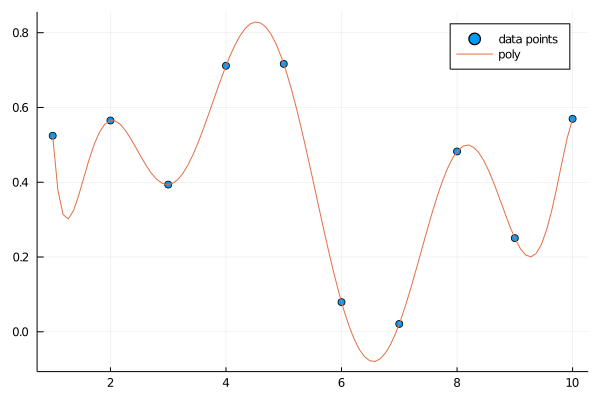

In [10]:
using Polynomials
using Plots
xp = 1:10#[Float64(i) for i in 1:10]
yp = [rand() for _ in xp]
f=fit(xp,yp)
points = scatter(xp,yp , label="data points")
plot!(f , extrema(xp)... , label="poly")

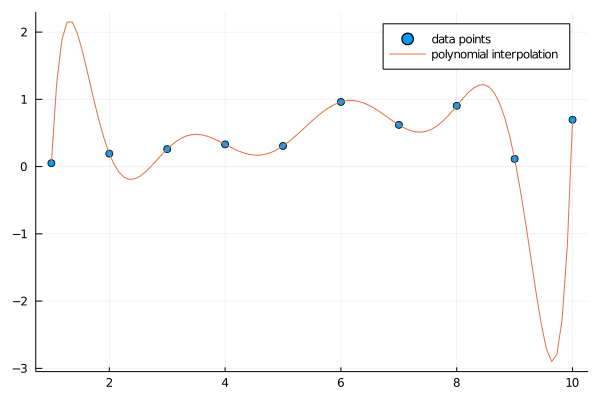

In [35]:
plot!(f,  extrema(xp)..., label="polynomial interpolation")

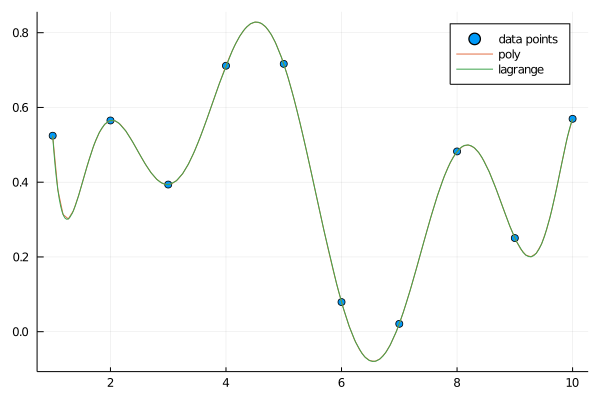

In [11]:
la(x) = lagrange(xp,yp , x)
plot!(la , extrema(xp)... , label="lagrange")

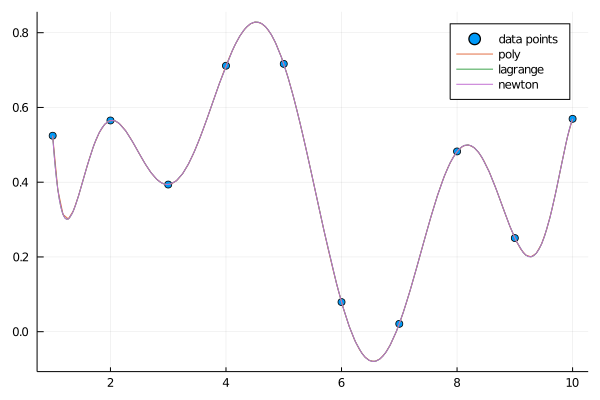

In [12]:

d=divdif(xp,yp)
new(x) = newton(xp , d , x)
plot!(new , extrema(xp)... , label="newton")


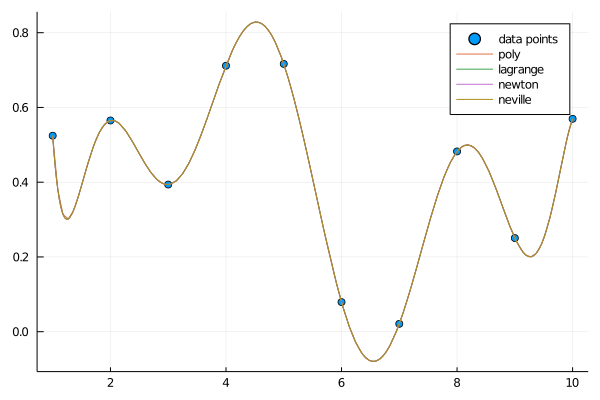

In [13]:
ne(x) = neville(xp,yp , x)
plot!(ne , extrema(xp)... , label="neville")

In [7]:

pomiary=DataFrame()
pomiary.liczba_punktow = 100:200:1900
punkty = [[rand() for _ in 1:j] for j in pomiary.liczba_punktow]
pomiary.lagrange = [rand() for _ in 1:10]
pomiary.lagrange_std = [rand() for _ in 1:10]

for i in 1:size(punkty)[1]
    xs=1:pomiary.liczba_punktow[i]
    ys=punkty[i]
    la(x) = lagrange(xs,ys , x)
    pruba = zeros(Float64, 10)
    for j in 1:10
        t0 = time()
        plot(la)
        pruba[j] = time()-t0
    end
    pomiary.lagrange[i] = mean(pruba)
    pomiary.lagrange_std[i] = std(pruba)
end

pomiary.newton_wielomian = [rand() for _ in 1:10]
pomiary.newton_ewaluacja = [rand() for _ in 1:10]
pomiary.newton_wielomian_std = [rand() for _ in 1:10]
pomiary.newton_ewaluacja_std = [rand() for _ in 1:10]
for i in 1:size(punkty)[1]
    xs=1:pomiary.liczba_punktow[i]
    ys=punkty[i]
    pruba_wielo = zeros(Float64, 10)
    pruba_ewa = zeros(Float64, 10)
    for j in 1:10
        t0 = time()
        d=divdif(xs,ys)
        pruba_wielo[j] = time()-t0
        newt(x) = newton(xs , d , x)
        t0 = time()
        plot(newt)
        pruba_ewa[j] = time()-t0
    end
    
    
    pomiary.newton_wielomian[i] = mean(pruba_wielo)
    pomiary.newton_ewaluacja[i] = mean(pruba_ewa)
    pomiary.newton_wielomian_std[i] = std(pruba_wielo)
    pomiary.newton_ewaluacja_std[i] = std(pruba_ewa)
end

pomiary.poly_wielomian = [rand() for _ in 1:10]
pomiary.poly_ewaluacja = [rand() for _ in 1:10]
pomiary.poly_wielomian_std = [rand() for _ in 1:10]
pomiary.poly_ewaluacja_std = [rand() for _ in 1:10]
for i in 1:size(punkty)[1]
    xs=1:pomiary.liczba_punktow[i]
    ys=punkty[i]
    pruba_wielo = zeros(Float64, 10)
    pruba_ewa = zeros(Float64, 10)
    for j in 1:10
        t0 = time()
        fi=fit(xs,ys)
        pruba_wielo[j] = time()-t0
        t0 = time()
        #plot(fi)
        pruba_ewa[j] = time()-t0
    end
    pomiary.poly_wielomian[i] = mean(pruba_wielo)
    pomiary.poly_ewaluacja[i] = mean(pruba_ewa)
    pomiary.poly_wielomian_std[i] = std(pruba_wielo)
    pomiary.poly_ewaluacja_std[i] = std(pruba_ewa)
end






In [14]:
io = IOBuffer()
ioctx = IOContext(io, :limit => false)
show(ioctx, MIME("text/html"), pomiary)
HTML(String(take!(io)))

,liczba_punktow,lagrange,lagrange_std,newton_wielomian,newton_ewaluacja,newton_wielomian_std,newton_ewaluacja_std,poly_wielomian,poly_ewaluacja,poly_wielomian_std,poly_ewaluacja_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100,0.0608,0.185591,0.000100017,0.0331,0.00031628,0.0990829,0.0,0.0,0.0,0.0
2,300,0.0096,0.000699178,0.000200009,0.000899982,0.000421657,0.000316222,0.000200009,0.0,0.000421657,0.0
3,500,0.0259,0.00166334,0.00079999,0.000900006,0.000421632,0.00031623,0.000399995,0.0,0.000516391,0.0
4,700,0.0481,0.00299808,0.00159998,0.00090003,0.000516391,0.000316238,0.000800014,0.0,0.000421644,0.0
5,900,0.0723,0.000483066,0.00249994,0.00100005,0.000527033,0.00047137,0.0013,0.0,0.000483,0.0
6,1100,6.3139,1.9141,0.0173,0.00909998,0.00048311,0.00031623,0.00189998,0.0,0.000316247,0.0
7,1300,9.8572,0.200885,0.0052,0.000899982,0.000421657,0.000316222,0.00310001,0.0,0.0011005,0.0
8,1500,12.1988,0.240275,0.00699999,0.000999999,7.53946e-8,1.15167e-7,0.00319998,0.0,0.000421619,0.0
9,1700,14.4091,0.335291,0.0478,0.013,0.000421682,0.00216027,0.00410001,0.0,0.00031618,0.0


In [15]:
plot(pomiary.lagrange)
plot!(pomiary.newton_wielomian +pomiary.newton_ewaluacja)


LoadError: [91mUndefVarError: newton_ewaluacja not defined[39m

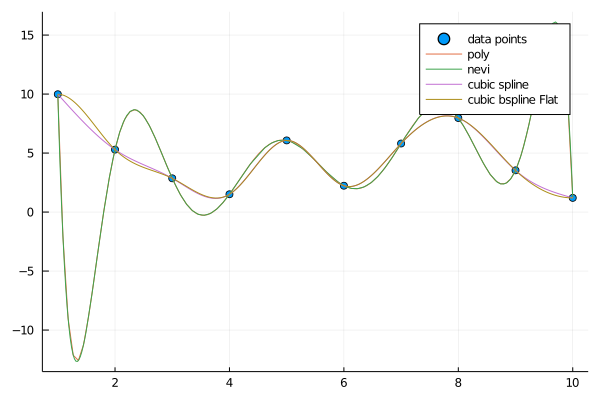

In [39]:

xp = 1:10
xsf=1:0.01:10
yp = [rand()*10 for _ in xp]
f=fit(xp,yp)
points = scatter(xp,yp , label="data points")
plot!(f , extrema(xp)... , label="poly")
ne(x) = neville(xp,yp , x)
plot!(ne , extrema(xp)... , label="nevi")

itp = CubicSplineInterpolation(xp, yp)
ys3=[itp(x) for x in xsf]
plot!(xsf, ys3, label="cubic spline")
itp2 = interpolate(yp, BSpline(Cubic(Natural(OnGrid()))))
yb3 = [itp2(x) for x in xsf]
plot!(xsf, yb3, label="cubic bspline Flat")
#Natural
#Flat